In [ ]:
import numpy as np

#f = w*x + 0 -> w = 2 (expected)

x = np.array([1,2,3,4],dtype=np.float32)
y = np.array([2,4,6,8],dtype=np.float32)

w = 0.0

def frd(x):
  return x*w

print(f"Prediction before training: {frd(5)}")

def loss(y,y_pred):
  return ((y_pred-y)**2).mean()

def gradient(x,y,y_pred):
  return np.dot(2*x,y_pred-y).mean()

l_rt = 0.01
iters = 10

for i in range(iters):
  y_pred = frd(x)
  l = loss(y,y_pred)
  dw = gradient(x,y,y_pred)
  w -= l_rt * dw

print(f"Prediction after training: {frd(5):.3f}")

print(f"w = {w:.3f}")


Prediction before training: 0.0
Prediction after training: 9.999
w = 2.000


In [ ]:
import torch.nn as nn
import torch

x = torch.tensor([[1], [2], [3], [4]], dtype=torch.float32) #tensor[4][1]
y = torch.tensor([[2], [4], [6], [8]], dtype=torch.float32)

class LinReg(nn.Module):
  def __init__(self,_in_features,out_features):
    super(LinReg,self).__init__()
    self.lin = nn.Linear(_in_features,out_features)
  def forward(self,x):
    return self.lin(x)

model = LinReg(1,1)

X_tst = torch.tensor([5],dtype=torch.float32)

print(f"Prediction before training: {model(X_tst).item():.3f}")

l_rt = 0.05
iters = 1000

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=l_rt)

for i in range(iters):
  y_pred = model(x)
  l = loss(y,y_pred)
  l.backward()
  optimizer.step()
  optimizer.zero_grad()

print(f"Prediction after training: {model(X_tst).item():.3f}")


Prediction before training: -4.407
Prediction after training: 10.000


torch.Size([100])
torch.Size([100, 1])
Pred = 70.63877868652344


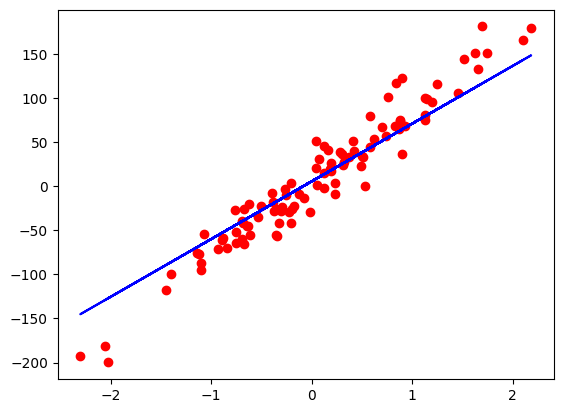

In [ ]:
import torch.nn as nn
import torch
import numpy as np
import sklearn.datasets as datasets
import matplotlib.pyplot as plt

x_rand,y_rand = datasets.make_regression(n_samples=100,n_features=1,noise=20,random_state=1)

lrt = 0.01
iters = 100

x = torch.from_numpy(x_rand.astype(np.float32))
y = torch.from_numpy(y_rand.astype(np.float32))
print(y.shape)
y = y.view(y.shape[0],1) # 100, -> 100,1
print(y.shape)

model = nn.Linear(1,1)
loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=lrt)

for e in range(iters):
  y_pred = model(x)
  l = loss(y_pred,y)
  l.backward()
  optimizer.step()
  optimizer.zero_grad()

#ten[1][1]
tst = torch.tensor([1],dtype=torch.float32)

print(f"Pred = {model(tst).item()}")

m_pred = model(x).detach().numpy()

plt.plot(x_rand,y_rand,"ro")
plt.plot(x_rand,m_pred,"b")
plt.show()

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import sklearn.datasets as datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#
bc = datasets.load_breast_cancer()
x,y = bc.data,bc.target

n_samp,n_feat = x.shape

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1234)

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

x_train = torch.from_numpy(x_train.astype(np.float32))
x_test = torch.from_numpy(x_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

y_train = y_train.view(y_train.shape[0],1)
y_test = y_test.view(y_test.shape[0],1)

class LogReg(nn.Module):
  def __init__(self,_in_features):
    super(LogReg,self).__init__()
    self.lin = nn.Linear(_in_features,1)

  def forward(self,x):
    y_pred = torch.sigmoid(self.lin(x))
    return y_pred

iter = 100
lrt = 0.01
model = LogReg(n_feat)
loss = nn.BCELoss()
optimiser = torch.optim.SGD(model.parameters(),lr=lrt)

for i in range(iter):
  y_pred = model(x_train)
  l = loss(y_pred,y_train)
  l.backward()
  optimiser.step()
  optimiser.zero_grad()

with torch.no_grad():
  y_pred = model(x_test)
  y_pred_cls = y_pred.round()
  acc = y_pred_cls.eq(y_test).sum() / float(y_test.shape[0])
  print(f"Accuracy = {acc*100:.4f}%")

Accuracy = 92.1053%
